In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from scipy.stats.distributions import chi2

In [2]:
import warnings
warnings.filterwarnings ('ignore')

In [3]:
airline_data = pd.read_excel('Airlines+Data.xlsx',index_col='Month',parse_dates=True)
airline_data.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [4]:
airline_data.shape

(96, 1)

In [6]:
airline_data.index.freq= 'MS'

In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [8]:
airline_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


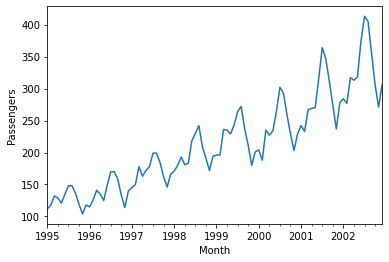

In [9]:
airline_data['Passengers'].plot()
plt.ylabel('Passengers')
plt.show()

In [11]:
adfuller(airline_data.Passengers)

(1.3402479596467052,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

Data is not stationary

Data includes trend and seasonality

### Triple Exponential Smoothing

In [12]:
airline_data['Mul_Mul'] = ExponentialSmoothing(airline_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline_data.head()

,Passengers,Mul_Mul
Month,,
1995-01-01,112,113.645123
1995-02-01,118,111.327150
1995-03-01,132,134.355876
1995-04-01,129,129.668618
1995-05-01,121,129.739615


In [13]:
airline_data['Add_Mul'] = ExponentialSmoothing(airline_data['Passengers'],trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues

In [14]:
airline_data['Mul_Add'] = ExponentialSmoothing(airline_data['Passengers'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues

In [15]:
airline_data['Add_Add'] = ExponentialSmoothing(airline_data['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

In [16]:
mse_1 = mean_squared_error(airline_data['Passengers'],airline_data['Mul_Mul'])

mse_2 = mean_squared_error(airline_data['Passengers'],airline_data['Add_Mul'])

mse_3 = mean_squared_error(airline_data['Passengers'],airline_data['Mul_Add'])

mse_4 = mean_squared_error(airline_data['Passengers'],airline_data['Add_Add'])

In [17]:
print(mse_1)
print(mse_2)
print(mse_3)
print(mse_4)

45.34082054699243
46.069591378889065
98.11929156615322
101.74217185180525


Model with both multiplicative trend and multiplicative seasonality is showing the best result.

In [18]:
print('RMSE = ',np.sqrt(mse_1))

RMSE =  6.733559277751436


In [ ]:
airline_data[['Passengers','Mul_Mul']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

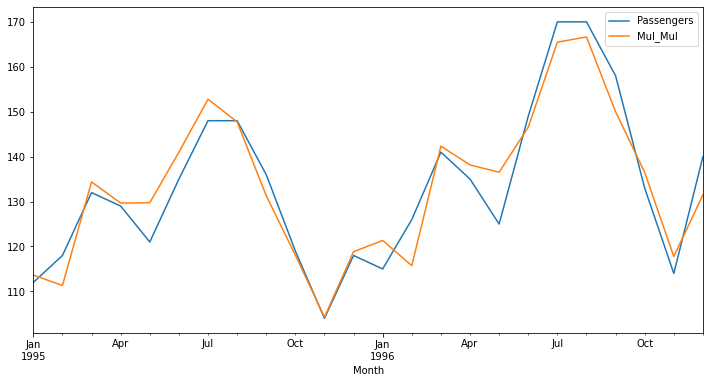

In [19]:
airline_data[['Passengers','Mul_Mul']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [21]:
airline_data

,Passengers,Mul_Mul,Add_Mul,Mul_Add,Add_Add
Month,,,,,
1995-01-01,112,113.645123,113.177956,111.999568,112.000479
1995-02-01,118,111.327150,111.887419,119.179487,119.931234
1995-03-01,132,134.355876,135.732962,133.127859,134.246757
1995-04-01,129,129.668618,130.699044,129.551141,130.734777
1995-05-01,121,129.739615,130.785769,122.483145,123.861636
...,...,...,...,...,...
2002-08-01,405,408.197705,406.594341,389.300973,384.892545
2002-09-01,355,360.419249,358.686297,355.899679,351.786470
2002-10-01,306,313.038578,311.277494,318.298837,314.401080


In [22]:
del airline_data['Mul_Mul']
del airline_data['Mul_Add']
del airline_data['Add_Add']
del airline_data['Add_Mul']

In [23]:
airline_data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [25]:
train_data  = airline_data.iloc[:76]
test_data = airline_data.iloc[76:]

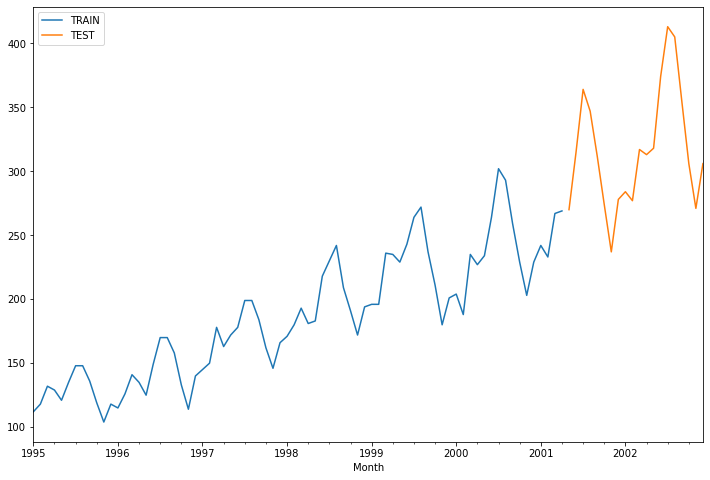

In [26]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

In [27]:
TES = ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
TES_fitted = TES.fit()

In [28]:
test_pred = TES_fitted.forecast(20)
test_pred

2001-05-01    265.070462
2001-06-01    294.736025
2001-07-01    326.269298
2001-08-01    328.795250
2001-09-01    292.368794
2001-10-01    258.919930
2001-11-01    227.774333
2001-12-01    258.794331
2002-01-01    265.560404
2002-02-01    264.200398
2002-03-01    307.642689
2002-04-01    299.451389
2002-05-01    298.021178
2002-06-01    331.374446
2002-07-01    366.827597
2002-08-01    369.667548
2002-09-01    328.712946
2002-10-01    291.106078
2002-11-01    256.088795
2002-12-01    290.964866
Freq: MS, dtype: float64

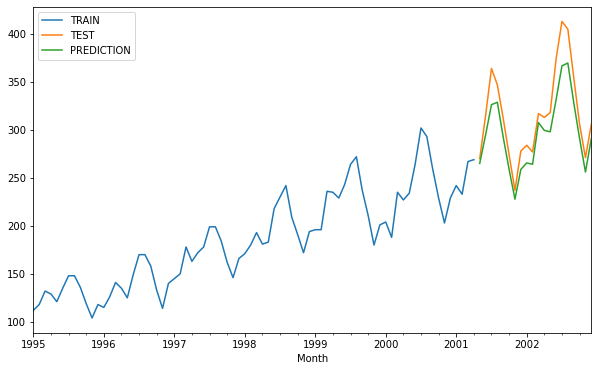

In [29]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST')
test_pred.plot(legend=True,label='PREDICTION',figsize=(10,6));

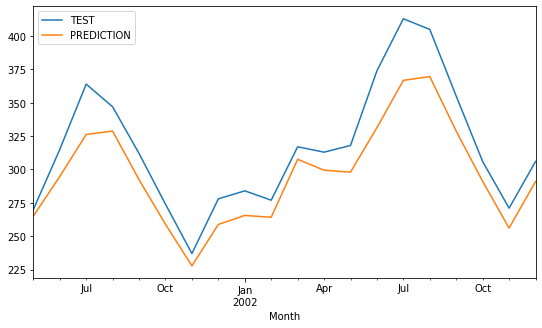

In [30]:
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(9,5))
test_pred.plot(legend=True,label='PREDICTION',xlim=['2001-05-01','2002-12-01']);


### Forecsating to Future

In [32]:
TES_final = ExponentialSmoothing(airline_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
TES_forecast = TES_final.forecast(20)

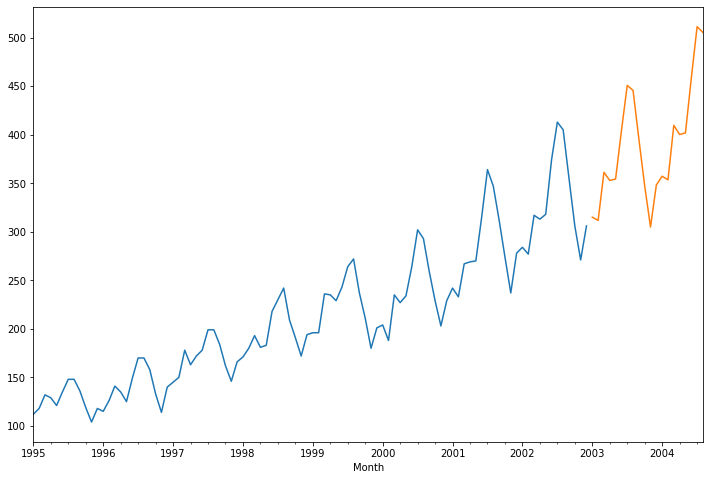

In [33]:
airline_data['Passengers'].plot(figsize=(12,8))
TES_forecast.plot();

### RMSE 

In [34]:
TES_mse = mean_squared_error(test_data['Passengers'],test_pred)
TES_mse

549.4642655043402

In [35]:
print('TES_rmse = ',np.sqrt(TES_mse))

TES_rmse =  23.440654118525366


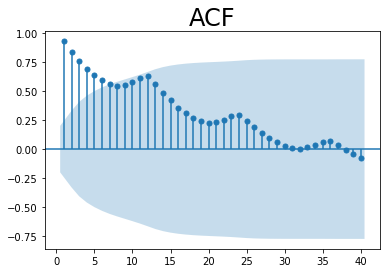

In [38]:
sgt.plot_acf(airline_data.Passengers,lags=40,zero=False)
plt.title("ACF", size=24)
plt.show()

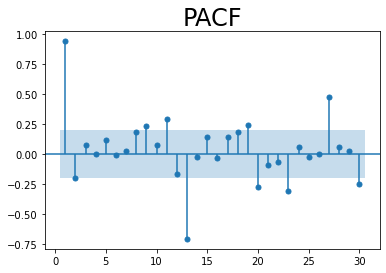

In [41]:
sgt.plot_pacf(airline_data.Passengers,lags=30,zero=False)
plt.title("PACF", size=24)
plt.show()

### LLR Test

In [39]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### AR model

In [43]:
ar_1 = ARMA(airline_data['Passengers'],order=(1,0))
results_ar1 = ar_1.fit()

In [44]:
 results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(1, 0)   Log Likelihood                -438.831
Method:                       css-mle   S.D. of innovations             23.098
Date:                Wed, 09 Nov 2022   AIC                            883.661
Time:                        12:37:47   BIC                            891.354
Sample:                    01-01-1995   HQIC                           886.771
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              212.3072     42.364      5.011      0.000     129.275     295.339
ar.L1.Passengers     0.9534      0.030     31.819      0.000       0.895       1.012
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0489           +0.0000j            1.0489            0.0000
-----------------------------------------------------------------------------
"""

In [45]:
ar_2 = ARMA(airline_data.Passengers,order=(2,0))
results_ar2 = ar_2.fit()

In [46]:
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(2, 0)   Log Likelihood                -434.852
Method:                       css-mle   S.D. of innovations             22.144
Date:                Wed, 09 Nov 2022   AIC                            877.704
Time:                        12:38:04   BIC                            887.961
Sample:                    01-01-1995   HQIC                           881.850
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              214.0088     33.016      6.482      0.000     149.298     278.719
ar.L1.Passengers     1.2246      0.098     12.463      0.000       1.032       1.417
ar.L2.Passengers    -0.2866      0.099     -2.886      0.004      -0.481      -0.092
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0996           +0.0000j            1.0996            0.0000
AR.2            3.1730           +0.0000j            3.1730            0.0000
-----------------------------------------------------------------------------
"""

In [47]:
LLR_test(ar_1,ar_2)

0.005

Reject null hypothesis. Therefore ar_2 is a better model than ar_1

In [48]:
ar_3 = ARMA(airline_data.Passengers,order=(3,0))
results_ar3 = ar_3.fit()

In [49]:
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(3, 0)   Log Likelihood                -432.832
Method:                       css-mle   S.D. of innovations             21.662
Date:                Wed, 09 Nov 2022   AIC                            875.665
Time:                        12:38:23   BIC                            888.486
Sample:                    01-01-1995   HQIC                           880.847
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              214.7184     40.411      5.313      0.000     135.515     293.922
ar.L1.Passengers     1.2914      0.102     12.699      0.000       1.092       1.491
ar.L2.Passengers    -0.5490      0.161     -3.400      0.001      -0.866      -0.233
ar.L3.Passengers     0.2108      0.104      2.036      0.042       0.008       0.414
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0563           -0.0000j            1.0563           -0.0000
AR.2            0.7741           -1.9727j            2.1192           -0.1905
AR.3            0.7741           +1.9727j            2.1192            0.1905
-----------------------------------------------------------------------------
"""

In [50]:
LLR_test(ar_2,ar_3)

0.044

Reject null hypothesis. Therefore ar_3 is a better model than ar_2.

In [51]:
ar_4 = ARMA(airline_data.Passengers,order = (4,0))
results_ar4 = ar_4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   96
Model:                     ARMA(4, 0)   Log Likelihood                -432.603
Method:                       css-mle   S.D. of innovations             21.604
Date:                Wed, 09 Nov 2022   AIC                            877.206
Time:                        12:38:37   BIC                            892.592
Sample:                    01-01-1995   HQIC                           883.425
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              215.3296     43.710      4.926      0.000     129.660     300.999
ar.L1.Passengers     1.2794      0.103     12.434      0.000       1.078       1.481
ar.L2.Passengers    -0.5129      0.170     -3.025      0.002      -0.845      -0.181
ar.L3.Passengers     0.1189      0.170      0.698      0.485      -0.215       0.453
ar.L4.Passengers     0.0725      0.107      0.679      0.497      -0.137       0.282
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0459           -0.0000j            1.0459           -0.0000
AR.2            0.8361           -1.5251j            1.7393           -0.1702
AR.3            0.8361           +1.5251j            1.7393            0.1702
AR.4           -4.3581           -0.0000j            4.3581           -0.5000
-----------------------------------------------------------------------------
"""

In [52]:
LLR_test(ar_3,ar_4)

0.498

Fail to reject the null hypothesis.
 There is no improvement from ar_3 to ar_4

#### AR(3) Model

In [53]:
model_ar3 = ARMA(train_data.Passengers,order=(3,0))
model_ar3_fitted = model_ar3.fit()

In [54]:
(train_data.shape,
test_data.shape)

((76, 1), (20, 1))

In [55]:
ar3_test_pred = model_ar3_fitted.predict(76,95)
ar3_test_pred

2001-05-01    259.393444
2001-06-01    251.977356
2001-07-01    247.069686
2001-08-01    242.782626
2001-09-01    238.606697
2001-10-01    234.663813
2001-11-01    231.031317
2001-12-01    227.689426
2002-01-01    224.603601
2002-02-01    221.750937
2002-03-01    219.114646
2002-04-01    216.678967
2002-05-01    214.428671
2002-06-01    212.349564
2002-07-01    210.428600
2002-08-01    208.653755
2002-09-01    207.013920
2002-10-01    205.498825
2002-11-01    204.098981
2002-12-01    202.805620
Freq: MS, dtype: float64

In [56]:
ar3_pred_df = pd.DataFrame(ar3_test_pred,columns=test_data.columns)
ar3_pred_df

,Passengers
2001-05-01,259.393444
2001-06-01,251.977356
2001-07-01,247.069686
2001-08-01,242.782626
2001-09-01,238.606697
2001-10-01,234.663813
2001-11-01,231.031317
2001-12-01,227.689426
2002-01-01,224.603601
2002-02-01,221.750937


In [57]:
mse_ar3 = mean_squared_error(test_data.Passengers,ar3_pred_df.Passengers)
mse_ar3

11356.43871773451

In [58]:
print("RMSE = ",np.round(np.sqrt(mse_ar3),2))

RMSE =  106.57


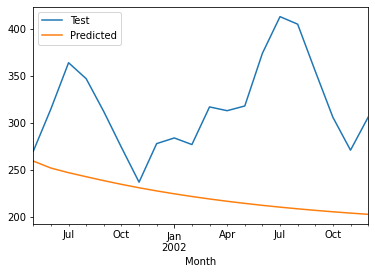

In [59]:
test_data['Passengers'].plot(legend=True,label='Test')
ar3_pred_df['Passengers'].plot(legend = True,label = 'Predicted');

### MA Model

In [61]:
ma_1 = ARMA(airline_data.Passengers[1:],order=(0,1))
results_ma1 = ma_1.fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   95
Model:                     ARMA(0, 1)   Log Likelihood                -485.034
Method:                       css-mle   S.D. of innovations             39.314
Date:                Wed, 09 Nov 2022   AIC                            976.068
Time:                        12:39:30   BIC                            983.730
Sample:                    02-01-1995   HQIC                           979.164
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              215.1092      7.911     27.190      0.000     199.603     230.615
ma.L1.Passengers     0.9714      0.035     27.471      0.000       0.902       1.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0295           +0.0000j            1.0295            0.5000
-----------------------------------------------------------------------------
"""

In [62]:
ma_4 =ARMA(airline_data.Passengers[1:],order=[0,4])
results_ma4 = ma_4.fit()
results_ma4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   95
Model:                     ARMA(0, 4)   Log Likelihood                -437.106
Method:                       css-mle   S.D. of innovations             23.419
Date:                Wed, 09 Nov 2022   AIC                            886.212
Time:                        12:39:43   BIC                            901.535
Sample:                    02-01-1995   HQIC                           892.404
                         - 12-01-2002                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              214.8701     13.448     15.977      0.000     188.512     241.228
ma.L1.Passengers     1.5781      0.109     14.427      0.000       1.364       1.793
ma.L2.Passengers     1.6431      0.177      9.279      0.000       1.296       1.990
ma.L3.Passengers     1.2133      0.178      6.817      0.000       0.864       1.562
ma.L4.Passengers     0.2593      0.128      2.034      0.042       0.009       0.509
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.2002           -1.0256j            1.0450           -0.2807
MA.2           -0.2002           +1.0256j            1.0450            0.2807
MA.3           -1.1171           -0.0000j            1.1171           -0.5000
MA.4           -3.1608           -0.0000j            3.1608           -0.5000
-----------------------------------------------------------------------------
"""

#### MA(7) Model

In [63]:
model_ma7 = ARMA(train_data.Passengers,order=(0,7))
model_ma7_fitted = model_ma7.fit()

In [64]:
ma7_test_pred = model_ma7_fitted.predict(76,95)

In [65]:
ma7_pred_df = pd.DataFrame(ma7_test_pred,columns=test_data.columns)
ma7_pred_df

,Passengers
2001-05-01,269.496188
2001-06-01,269.092289
2001-07-01,267.172940
2001-08-01,237.187061
2001-09-01,197.687191
2001-10-01,179.226826
2001-11-01,173.539985
2001-12-01,186.720649
2002-01-01,186.720649
2002-02-01,186.720649


In [66]:
mse_ma7 = mean_squared_error(test_data.Passengers,ma7_pred_df.Passengers)
mse_ma7

16175.776846709216

In [67]:
print("RMSE = ",np.round(np.sqrt(mse_ma7),2))

RMSE =  127.18


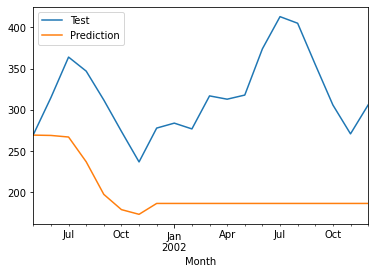

In [68]:
test_data.Passengers.plot(legend = True,label = 'Test')
ma7_pred_df.Passengers.plot(legend = True, label= 'Prediction');

### ARIMA Model

In [71]:
airline_data['d1'] = diff(airline_data['Passengers'],k_diff=1)

In [72]:
airline_data

,Passengers,d1
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [73]:
adfuller(airline_data['d1'].iloc[1:])

(-2.150001735920649,
 0.22488942647512727,
 12,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 613.1127223022611)

Fail to reject null hypothesis

Data is still stationary

<AxesSubplot:xlabel='Month'>

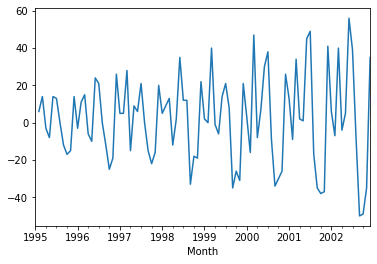

In [74]:
airline_data.d1.plot()

In [78]:
airline_data['d2'] = diff(airline_data['Passengers'],k_diff=2)
airline_data

,Passengers,d1,d2
Month,,,
1995-01-01,112,NaN,NaN
1995-02-01,118,6.0,NaN
1995-03-01,132,14.0,8.0
1995-04-01,129,-3.0,-17.0
1995-05-01,121,-8.0,-5.0
...,...,...,...
2002-08-01,405,-8.0,-47.0
2002-09-01,355,-50.0,-42.0
2002-10-01,306,-49.0,1.0


In [79]:
adfuller(airline_data['d2'].iloc[2:])

(-11.547980944840814,
 3.503180236321157e-21,
 11,
 82,
 {'1%': -3.512738056978279,
  '5%': -2.8974898650628984,
  '10%': -2.585948732897085},
 610.2950766130398)

Reject null hypothesis

Data is stationary

<AxesSubplot:xlabel='Month'>

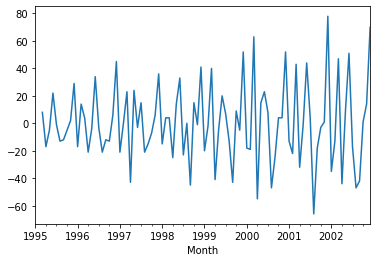

In [80]:
airline_data.d2.plot()

In [81]:
model_1 = ARIMA(airline_data['Passengers'],order=(3,2,6))
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                   94
Model:                 ARIMA(3, 2, 6)   Log Likelihood                -408.935
Method:                       css-mle   S.D. of innovations             17.233
Date:                Wed, 09 Nov 2022   AIC                            839.871
Time:                        12:57:08   BIC                            867.847
Sample:                    03-01-1995   HQIC                           851.171
                         - 12-01-2002                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0198      0.014      1.441      0.150      -0.007       0.047
ar.L1.D2.Passengers    -0.1571      0.493     -0.319      0.750      -1.123       0.808
ar.L2.D2.Passengers    -0.4837      0.124     -3.912      0.000      -0.726      -0.241
ar.L3.D2.Passengers     0.1191      0.243      0.490      0.624      -0.357       0.595
ma.L1.D2.Passengers    -0.7043      1.507     -0.467      0.640      -3.657       2.249
ma.L2.D2.Passengers    -0.1214      5.996     -0.020      0.984     -11.874      11.631
ma.L3.D2.Passengers    -0.6713      9.173     -0.073      0.942     -18.650      17.307
ma.L4.D2.Passengers    -0.3356      4.386     -0.077      0.939      -8.931       8.260
ma.L5.D2.Passengers     0.7258      5.303      0.137      0.891      -9.668      11.120
ma.L6.D2.Passengers     0.1166      0.966      0.121      0.904      -1.777       2.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3283           -1.2929j            1.3340           -0.2896
AR.2           -0.3283           +1.2929j            1.3340            0.2896
AR.3            4.7173           -0.0000j            4.7173           -0.0000
MA.1            0.9990           -0.0447j            1.0000           -0.0071
MA.2            0.9990           +0.0447j            1.0000            0.0071
MA.3           -0.1896           -0.9819j            1.0000           -0.2804
MA.4           -0.1896           +0.9819j            1.0000            0.2804
MA.5           -1.3134           -0.0000j            1.3134           -0.5000
MA.6           -6.5316           -0.0000j            6.5316           -0.5000
-----------------------------------------------------------------------------
"""

In [83]:
model_2 = ARIMA(airline_data.Passengers,order=(3,2,5))
result_2 = model_2.fit()

In [84]:
LLR_test(model_1,model_2)

1.0

### ARIMA(3,2,1)

In [85]:
model_arima_325 = ARIMA(train_data.Passengers,order=(3,2,1))
arima_325_fitted = model_arima_325.fit()
arima_325_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                   74
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -323.195
Method:                       css-mle   S.D. of innovations             18.498
Date:                Wed, 09 Nov 2022   AIC                            658.390
Time:                        12:57:42   BIC                            672.214
Sample:                    03-01-1995   HQIC                           663.905
                         - 04-01-2001                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0046      0.093      0.049      0.961      -0.177       0.187
ar.L1.D2.Passengers     0.1711      0.116      1.479      0.139      -0.056       0.398
ar.L2.D2.Passengers    -0.1427      0.117     -1.217      0.224      -0.373       0.087
ar.L3.D2.Passengers    -0.1082      0.117     -0.925      0.355      -0.338       0.121
ma.L1.D2.Passengers    -1.0000      0.035    -28.598      0.000      -1.069      -0.931
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8069           -1.5813j            1.7753           -0.1749
AR.2            0.8069           +1.5813j            1.7753            0.1749
AR.3           -2.9327           -0.0000j            2.9327           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [86]:
arima_325_pred = arima_325_fitted.predict(76,95,typ = 'levels')
arima_325_pred

2001-05-01    267.864386
2001-06-01    266.111402
2001-07-01    268.167497
2001-08-01    271.307562
2001-09-01    274.161258
2001-10-01    276.404111
2001-11-01    278.471011
2001-12-01    280.630926
2002-01-01    282.902915
2002-02-01    285.204804
2002-03-01    287.490714
2002-04-01    289.762459
2002-05-01    292.035789
2002-06-01    294.318103
2002-07-01    296.608222
2002-08-01    298.903186
2002-09-01    301.201855
2002-10-01    303.504584
2002-11-01    305.811918
2002-12-01    308.124022
Freq: MS, dtype: float64

In [87]:
mse_arima_321 = mean_squared_error(arima_325_pred, test_data.Passengers)

In [88]:
print(f'RMSE = ',np.round(np.sqrt(mse_arima_321),2))

RMSE =  53.8


In [89]:
arima_325_df = pd.DataFrame(arima_325_pred,columns=test_data.columns)
arima_325_df

,Passengers
2001-05-01,267.864386
2001-06-01,266.111402
2001-07-01,268.167497
2001-08-01,271.307562
2001-09-01,274.161258
2001-10-01,276.404111
2001-11-01,278.471011
2001-12-01,280.630926
2002-01-01,282.902915
2002-02-01,285.204804


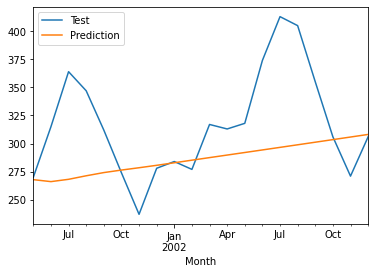

In [91]:
test_data.Passengers.plot(legend = True, label = 'Test')
arima_325_df.Passengers.plot(legend = True, label = 'Prediction');

In [90]:
df = pd.DataFrame()
df['test'] = arima_325_df['Passengers']
df['pred'] = test_data['Passengers']

In [92]:
df


,test,pred
2001-05-01,267.864386,270
2001-06-01,266.111402,315
2001-07-01,268.167497,364
2001-08-01,271.307562,347
2001-09-01,274.161258,312
2001-10-01,276.404111,274
2001-11-01,278.471011,237
2001-12-01,280.630926,278
2002-01-01,282.902915,284
2002-02-01,285.204804,277


### Forecasting into the future

In [93]:
model = ARIMA(airline_data.Passengers,order = (3,2,1))
model_fit = model.fit()

In [97]:
fcast = model_fit.predict(len(airline_data),len(airline_data)+20,typ='levels').rename('ARIMA(3,2,1) Forecast')
fcast

2003-01-01    331.408218
2003-02-01    337.641709
2003-03-01    332.785211
2003-04-01    329.606158
2003-05-01    331.284311
2003-06-01    335.248866
2003-07-01    338.716043
2003-08-01    341.050021
2003-09-01    342.912877
2003-10-01    344.930387
2003-11-01    347.219469
2003-12-01    349.614608
2004-01-01    351.975547
2004-02-01    354.282362
2004-03-01    356.575846
2004-04-01    358.887233
2004-05-01    361.219494
2004-06-01    363.562687
2004-07-01    365.909906
2004-08-01    368.260839
2004-09-01    370.617883
Freq: MS, Name: ARIMA(3,2,1) Forecast, dtype: float64

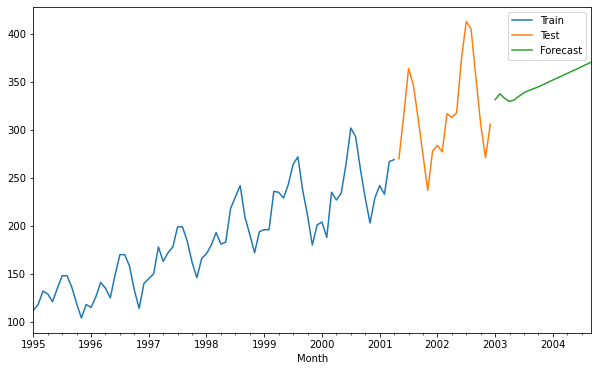

In [98]:
train_data['Passengers'].plot(legend = True, label = 'Train')
test_data['Passengers'].plot(legend = True, label = 'Test')
fcast.plot(legend=True, label='Forecast',figsize= (10,6));

**The rmse value of triple exponential smoothing model with multiplicative trend and multiplicative seasonality is the least among above models.<br>So it is the best model for forecasting.**